In [1]:
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, InputLayer, Dense, Dropout, ZeroPadding2D, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.initializers import he_normal
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

Using TensorFlow backend.


In [2]:
#Softmax output dim
num_classes = 10
batch_size = 140
epochs = 20

In [3]:
#Input
img_rows, img_cols = 28, 28

(X_train, y_train), (X_test, y_test) = mnist.load_data()

if K.image_data_format()=='channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
    
else:
    X_train = X_train.reshape(X_train.shape[0],  img_rows, img_cols,1)
    X_test = X_test.reshape(X_test.shape[0],  img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    

In [4]:
X_train.shape

(60000, 28, 28, 1)

In [5]:
X_test.shape

(10000, 28, 28, 1)

In [6]:
# Data Normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

old_v = tf.logging.get_verbosity
tf.logging.set_verbosity(tf.logging.ERROR)

In [7]:
X_train[0:30000]=np.fliplr(X_train[0:30000])
X_test[0:5000]=np.fliplr(X_test[0:5000])

In [8]:
type(X_train)

numpy.ndarray

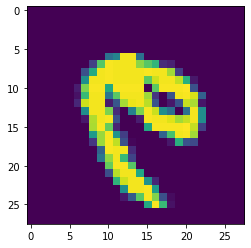

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_train[299].reshape(28,28))

In [18]:
# Converting y_train 10-D vector
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Model

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), strides =(1,1), padding = 'same',
                 activation = 'relu', input_shape = input_shape,
                 kernel_initializer = he_normal(seed=None)))

model.add(Conv2D(filters=16, kernel_size=(3,3), strides =(1,1), padding = 'same',
                 activation = 'relu', kernel_initializer = he_normal(seed=None)))

model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(BatchNormalization())

model.add(Dropout(0.25))

model.add(Conv2D(filters=16, kernel_size=(3,3), strides =(1,1), padding = 'same',
                 activation = 'relu', kernel_initializer = he_normal(seed=None)))

model.add(Conv2D(filters=16, kernel_size=(3,3), strides =(1,1), padding = 'same',
                 activation = 'relu', kernel_initializer = he_normal(seed=None)))

model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(units = 512, activation='relu', kernel_initializer= he_normal(seed=None)))

model.add(BatchNormalization())

model.add(Dropout(0.25))

model.add(Dense(units = 64, activation='relu', kernel_initializer= he_normal(seed=None)))

model.add(BatchNormalization())

model.add(Dropout(0.25))

model.add(Dense(units = num_classes, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

print(model.summary(), '\n')

history = model.fit(X_train, y_train, batch_size = batch_size,
                    epochs = epochs, verbose = 1, validation_data = (X_test, y_test))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 16)        2320      
__________

In [19]:
model.save('mnist.h5')
model.save_weights('mnist_weights.h5')

from sklearn.metrics import roc_auc_score
def auc (y_true, y_pred):
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)